# Heart attacks prediction

In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

## 1. Load the dataset

In [3]:
dataset = pd.read_csv('heart_attacks_data.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 2. Analyze data

In [4]:
#dimensions of the dataset
dataset.shape

(303, 14)

We have 303 instances to work with and can conﬁrm the data has 14 attributes including the output attribute charges.

In [6]:
#data types of each attribute
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

We can see that all of the attributes are numeric (float)

In [7]:
#peak of the data
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


We now have a better feeling for how diﬀerent the attributes are. The min and max values as well are the means vary a lot. We are likely going to get better results by rescaling the data in some way.

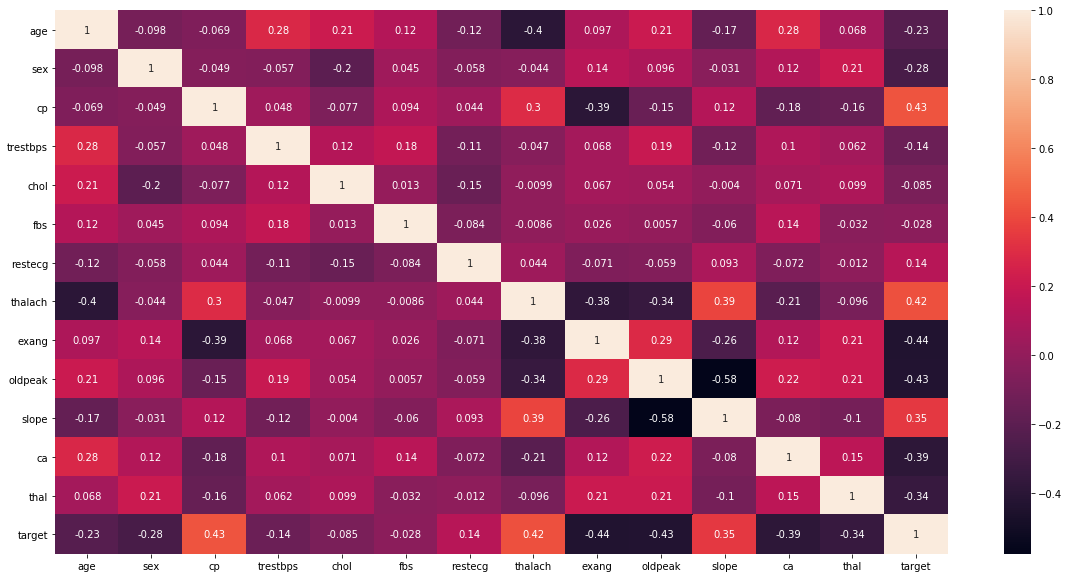

In [9]:
#take a look at the correlation between all of the numeric attributes
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
seaborn.heatmap(dataset.corr(method='pearson'), annot=True)
pyplot.show()

## 3. Data visualizations
### 3.1. Unimodal data visualizations
Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple diﬀerent visualizations in order to spark ideas.

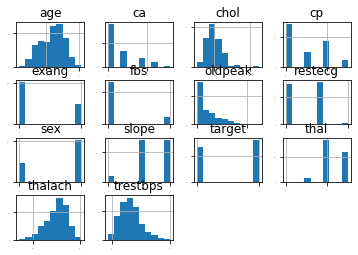

In [12]:
#histograms
#pyplot.figure(figsize=(20,10))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, layout=(4,4), ylabelsize=1)
#pyplot.figure(figsize=(20,10))
pyplot.show()

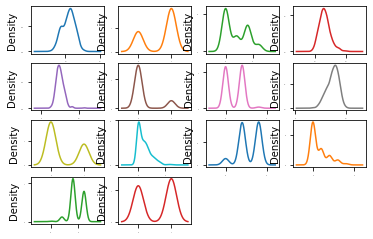

In [13]:
#density plots
#pyplot.figure(figsize=(20,10))
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()

This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

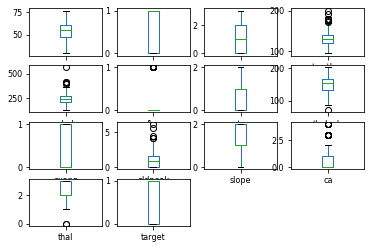

In [14]:
#box and whiskers plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
#pyplot.figure()
pyplot.show()

### 3.2. Multimodal data visualizations
Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix.

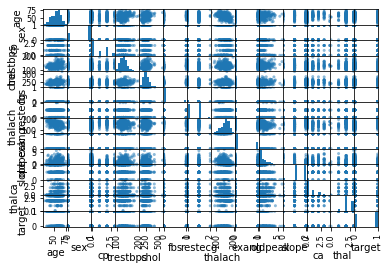

In [15]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [16]:
dataset.isnull().values.any()

False

In [18]:
#quick look at the breakdown of class values
dataset.groupby('target').size()

target
0    138
1    165
dtype: int64

## 4. Validation dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to conﬁrm the accuracy of our ﬁnal model. It is a smoke test that we can use to see if we messed up and to give us conﬁdence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [19]:
#split-out validation dataset
array = dataset.values
X = dataset.drop(['target'], axis=1).values
Y = dataset['target'].astype('category').values
val_size = 0.2
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((242, 13), (242,), (61, 13), (61,))

## 5. Evaluate algorithms: baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is a good standard test harness conﬁguration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [29]:
num_folds = 10
seed = 7
scoring = 'recall'

Let’s create a baseline of performance on this problem and spot-check a number of diﬀerent algorithms. We will select a suite of diﬀerent algorithms capable of working on this regression problem. The six algorithms selected include:
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [30]:
#spot-check algorithms
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.919006 (+-0.085864)
LDA: 0.927115 (+-0.070043)
KNN: 0.730321 (+-0.061576)
CART: 0.777959 (+-0.105844)
NB: 0.850844 (+-0.080669)
SVM: 0.836346 (+-0.102603)


Let’s take a look at the distribution of scores across all cross-validation folds by algorithm.

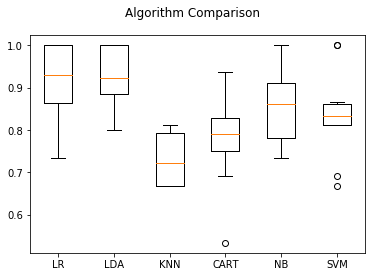

In [31]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Best models: LR (0.9190) and LDA (0.9271)

## 6. Evaluate algorithms: Standardization
We suspect that the diﬀering scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [32]:
#standardize the dataset
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.880481 (+-0.094350)
ScaledLDA: 0.927115 (+-0.070043)
ScaledKNN: 0.887756 (+-0.089300)
ScaledCART: 0.794541 (+-0.066104)
ScaledNB: 0.850844 (+-0.080669)
ScaledSVM: 0.904840 (+-0.077585)


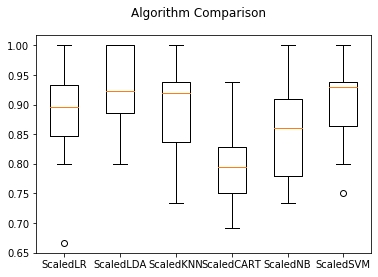

In [33]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The best ones, scaled LDA (0.9271) and Scaled SVM (0.9048).

## 7. Improve results with tunning
We know from the results in the previous section that LR achieves good results on the dataset. But can it do better.

In [34]:
#LDA algorithm tunning
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
kernel_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(solver=kernel_values)
model = LinearDiscriminantAnalysis()
kfol = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.927115 using {'solver': 'svd'}
0.927115 (0.070043) with: {'solver': 'svd'}
0.927115 (0.070043) with: {'solver': 'lsqr'}
0.927115 (0.070043) with: {'solver': 'eigen'}


You can see that the best values are (with a recall of 0.9271)

## 8. Ensemble methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four diﬀerent ensemble machine learning algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold.

### 8.1 Without standardization

In [35]:
#ensembles
ensembles = dict()
ensembles['AB'] = AdaBoostClassifier()
ensembles['GBM'] = GradientBoostingClassifier()
ensembles['RF'] = RandomForestClassifier()
ensembles['ET'] = ExtraTreesClassifier()
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.875897 (+-0.081238)
GBM: 0.888814 (+-0.067635)
RF: 0.893622 (+-0.103790)
ET: 0.866538 (+-0.112488)


We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

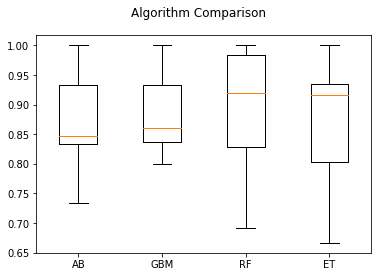

In [36]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like RF regressor has the better score (0.8936)

In [37]:
#ensembles
ensembles = dict()
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledAB: 0.875897 (+-0.081238)
ScaledGBM: 0.882564 (+-0.059467)
ScaledRF: 0.896314 (+-0.104090)
ScaledET: 0.872147 (+-0.100535)


We can see that we’re not getting better scores than our linear and nonlinear algorithms in previous sections.

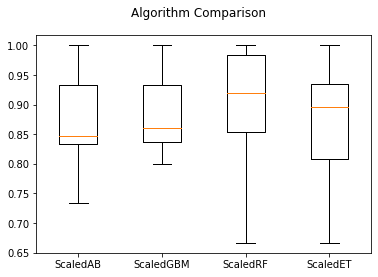

In [38]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 10. Finalize model
In this section we will ﬁnalize the LDA model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [39]:
#prepare and train the model
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [40]:
#transform the validation dataset
X_val = scaler.transform(X_val)
#make predictions
predictions = model.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.6885245901639344
[[21  9]
 [10 21]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Text(0.5, 1, 'Confusion matrix')

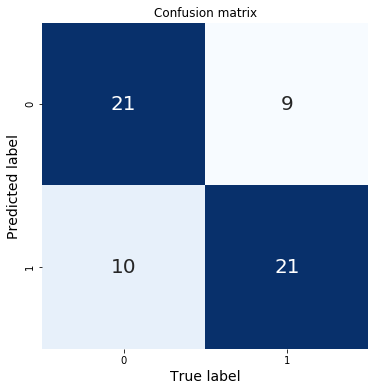

In [42]:
#plot the confusion matrix
pyplot.figure(figsize = (8,6))
seaborn.heatmap(confusion_matrix(Y_val, predictions), square=True, annot=True, annot_kws={"size": 20},
                cmap=pyplot.cm.Blues, cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])
pyplot.xlabel('True label', fontsize=14)
pyplot.ylabel('Predicted label', fontsize=14)
pyplot.title('Confusion matrix')

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

No handles with labels found to put in legend.


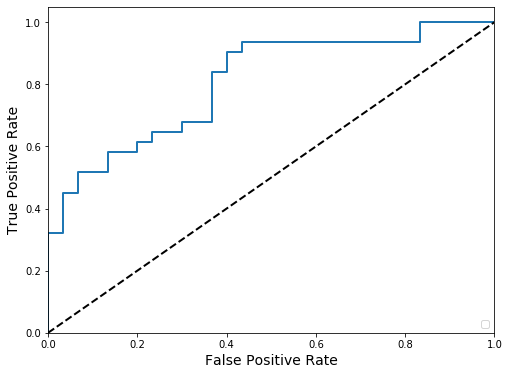

AUC:  0.8064516129032259


In [45]:
y_prob = model.predict_proba(X_val)
lb = LabelBinarizer()
y_test = lb.fit_transform(Y_val)
#Compute and plot ROC curve and ROC area for each class
pyplot.figure(figsize = (8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
pyplot.plot(fpr, tpr, lw=2)
pyplot.plot([0, 1], [0, 1], 'k--', lw=2)
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate', fontsize=14)
pyplot.ylabel('True Positive Rate', fontsize=14)
#plt.title('ROC Curves for subject %d' % (subject), fontisize=18)
pyplot.legend(loc="lower right")
pyplot.show()
print('AUC: ', roc_auc)